In [37]:
import pandas as pd
from pathlib import Path

path = Path('/home/caron/Bureau/csv')

departements = ['departement-01-ain', 'departement-25-doubs', 'departement-78-yvelines', 'departement-69-rhone']

files = []
for dept in departements:
    file = pd.read_csv(path / dept / 'firepoint' / 'NATURELSfire.csv')
    file['departement'] = dept
    file.rename({'1er engin SLL' : 'nb_eng_CC'}, inplace=True, axis=1)
    for col in ['id_intervention', 'longitude', 'FL_CCR_CCF', 'nb_eng_CC' ,'latitude', 'IN', 'type', 'coef', 'geometry', '1er engin SLL', 'N∞ inter', 'Type engin', 'Famille SDIS sinistre', 'Code sinistre', 'idk', 'centroid', 'altitude']:
        try:
            file.drop(col, inplace=True, axis=1)
        except:
            pass
        
    file.dropna(inplace=True)
    files.append(file)

files = pd.concat(files).reset_index(drop=True)
print(len(files))
files.dropna(inplace=True)
print(len(files))
files.to_csv('total_fire.csv', index=False)

9631
8569


In [39]:
import geopandas as gpd

geo = gpd.read_file(path / 'france' / 'data' / 'geo' / 'hexagones_france.gpkg')

In [42]:
geo

,index,hex_id,geometry
0,873963d9effffff,873963d9effffff,"POLYGON ((1.74608 42.76104, 1.74848 42.74876, ..."
1,871f95d00ffffff,871f95d00ffffff,"POLYGON ((4.04820 46.97083, 4.05040 46.95891, ..."
2,871fb5111ffffff,871fb5111ffffff,"POLYGON ((3.32456 49.35899, 3.32694 49.34747, ..."
3,873963b32ffffff,873963b32ffffff,"POLYGON ((2.61764 43.22444, 2.61993 43.21215, ..."
4,871fb6619ffffff,871fb6619ffffff,"POLYGON ((1.67773 47.82603, 1.66400 47.81901, ..."
...,...,...,...
111645,871f90b12ffffff,871f90b12ffffff,"POLYGON ((4.33265 46.18238, 4.33480 46.17034, ..."
111646,871fa2563ffffff,871fa2563ffffff,"POLYGON ((4.72273 49.38470, 4.72491 49.37310, ..."
111647,873966340ffffff,873966340ffffff,"POLYGON ((0.82276 43.53161, 0.80988 43.52402, ..."
111648,873965369ffffff,873965369ffffff,"POLYGON ((2.82629 44.74634, 2.82860 44.73422, ..."


In [41]:
files.rename({'h3': 'hex_id'}, inplace=True, axis=1)

In [44]:
files = files.set_index('hex_id').join(geo.set_index('hex_id')['geometry'], on='hex_id').reset_index()

In [46]:
files = gpd.GeoDataFrame(files, geometry=files.geometry)

<Axes: >

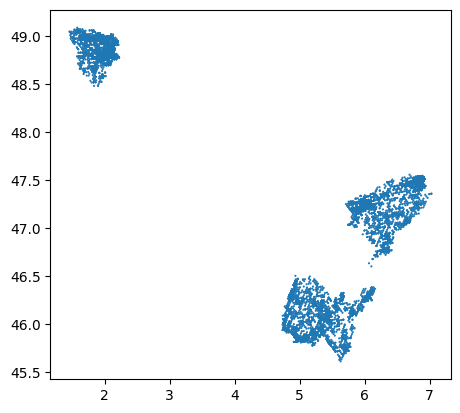

In [47]:
files.plot()

In [48]:
files.to_file('total_fire.geojson')